<a href="https://colab.research.google.com/github/koad7/3d_vision/blob/main/GAN_and_DIFFUSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import layers

In [ ]:
(train_images, _), (_,_) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1).astype('float32')

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_images[56782, :10, :10]

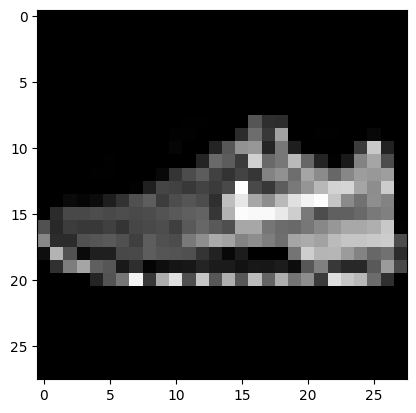

In [ ]:
train_images = (train_images - 127.5)/127.5
plt.imshow(train_images[2567].squeeze(), cmap = 'gray')

In [ ]:
buffer_size = 60000
batch_size = 128

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

In [ ]:
def generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(64, input_dim = 100))
  model.add(layers.ReLU())

  model.add(layers.Dense(128))
  model.add(layers.ReLU())

  model.add(layers.Dense(256))
  model.add(layers.ReLU())
  
  model.add(layers.Dense(784, activation = 'tanh'))
  model.add(layers.Reshape((28,28,1)))
  return model




In [ ]:
generator = generator_model() 

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 re_lu_2 (ReLU)              (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 784)               2

In [ ]:
noise = tf.random.normal([1,100])

In [ ]:
generated_image = generator(noise, training = False)

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

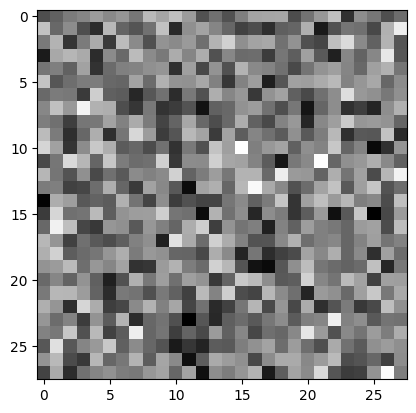

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap = 'gray')

In [ ]:
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Input(shape = (28,28,1)))
  model.add(layers.Flatten())

  model.add(layers.Dense(256))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(128))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(64))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1, activation ='sigmoid'))

  return model

In [ ]:
discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [ ]:
discriminator = discriminator_model()
output = discriminator(generated_image)
print(output)

tf.Tensor([[0.5377809]], shape=(1, 1), dtype=float32)


In [ ]:
bce = tf.keras.losses.BinaryCrossentropy()

In [ ]:
def discriminator_loss(real_output, fake_output):
  real_loss = bce(tf.ones_like(real_output), real_output)
  fake_loss = bce(tf.zeroes_like(fake_output),fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
def generator_loss(fake_output):
  gen_loss = bce(tf.nones_like(fake_output), fake_output)
  return gen_loss